In [47]:
import geopandas as gpd
import contextily as ctx
import pandas as pd
import seaborn as sns

# .gpkg file

In [ ]:
# Path to the .gpkg file 
mahsa_aoi_path = "f&t_mahsa_aoi.gpkg"

# Load GeoPackage
mahsa_aoi = gpd.read_file(mahsa_aoi_path)

# Show first few rows
print(mahsa_aoi.head())

# Print coordinate reference system
print(mahsa_aoi.crs)


                                            geometry
0  MULTIPOLYGON Z (((76 31 0, 77 31 0, 77 30 0, 7...
1  MULTIPOLYGON Z (((75 31 0, 76 31 0, 76 30 0, 7...
EPSG:4326


<Axes: >

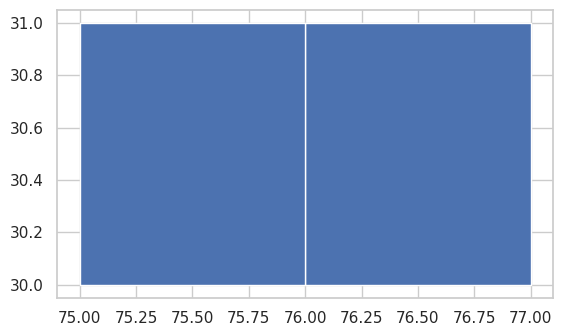

In [8]:
mahsa_aoi.plot()


#  mahsa sites

In [ ]:
# Path to the .gpkg file 
mahsa_sites_path = "mahsa_sites_20250707.gpkg"

# Load GeoPackage
mahsa_sites = gpd.read_file(mahsa_sites_path)

# Show first few rows
print(mahsa_sites.head())

# Print coordinate reference system
print(mahsa_sites.crs)


              mahsa_id    heritage_location_classification  \
0  HL-ML-PO0002-000062             Historical Map Features   
1  HL-HM-PO0023-000251  Non Archaeological/Natural Feature   
2  HL-ML-PO0180-000083  Non Archaeological/Natural Feature   
3  HL-ML-PO0180-000091                  No Visible Remains   
4  HL-HM-PO0002-000078           Built/Historical Heritage   

  heritage_location_form heritage_location_interperation  \
0                  Mound                         Unknown   
1                   None                            None   
2                   None                            None   
3                  Mound                         Unknown   
4              Structure                          Temple   

                    geometry  
0  POINT (76.15243 30.69456)  
1  POINT (75.98772 30.70094)  
2  POINT (75.85416 30.66915)  
3  POINT (75.78339 30.77996)  
4  POINT (76.06664 30.71952)  
EPSG:4326


In [12]:
print(mahsa_sites.columns)

Index(['mahsa_id', 'heritage_location_classification',
       'heritage_location_form', 'heritage_location_interperation',
       'geometry'],
      dtype='object')


In [14]:
print(mahsa_ids := mahsa_sites["mahsa_id"].unique())

['HL-ML-PO0002-000062' 'HL-HM-PO0023-000251' 'HL-ML-PO0180-000083'
 'HL-ML-PO0180-000091' 'HL-HM-PO0002-000078' 'HL-HM-PO0023-000252'
 'HL-HM-PO0023-000278' 'HL-HM-PO0023-000253' 'HL-FS-PO0023-000001'
 'HL-ML-PO0002-000065' 'HL-HM-PO0023-000291' 'HL-ML-PO0023-000305'
 'HL-ML-PO0180-000086' 'HL-ML-PO0023-000301' 'HL-HM-PO0002-000067'
 'HL-HM-PO0023-000274' 'HL-HM-PO0023-000265' 'HL-ML-PO0180-000092'
 'HL-ML-PO0180-000089' 'HL-ML-PO0023-000306' 'HL-HM-PO0023-000313'
 'HL-ML-PO0023-000296' 'HL-HM-PO0023-000269' 'HL-HM-PO0023-000290'
 'HL-ML-PO0023-000307' 'HL-HM-PO0023-000311' 'HL-ML-PO0002-000058'
 'HL-HM-PO0023-000250' 'HL-ML-PO0023-000300' 'HL-ML-PO0004-000367'
 'HL-ML-PO0023-000299' 'HL-HM-PO0002-000076' 'HL-HM-PO0023-000259'
 'HL-HM-PO0002-000079' 'HL-ML-PO0004-000368' 'HL-ML-PO0023-000297'
 'HL-HM-PO0023-000239' 'HL-ML-PO0004-000373' 'HL-HM-PO0023-000249'
 'HL-HM-PO0023-000262' 'HL-HM-PO0023-000287' 'HL-HM-PO0023-000272'
 'HL-ML-PO0180-000088' 'HL-ML-PO0004-000372' 'HL-ML-PO0002-000

In [17]:
duplicate_ids = mahsa_sites[mahsa_sites.duplicated(subset='mahsa_id', keep=False)]
print(duplicate_ids)


                mahsa_id    heritage_location_classification  \
7    HL-HM-PO0023-000253  Non Archaeological/Natural Feature   
8    HL-FS-PO0023-000001  Non Archaeological/Natural Feature   
20   HL-HM-PO0023-000313           Built/Historical Heritage   
21   HL-HM-PO0023-000313           Built/Historical Heritage   
37   HL-HM-PO0023-000253  Non Archaeological/Natural Feature   
39   HL-ML-PO0004-000373  Non Archaeological/Natural Feature   
40   HL-HM-PO0023-000249  Non Archaeological/Natural Feature   
74   HL-ML-PO0004-000373  Non Archaeological/Natural Feature   
78   HL-ML-PO0180-000078                  No Visible Remains   
94   HL-HM-PO0023-000249  Non Archaeological/Natural Feature   
95   HL-FS-PO0023-000001  Non Archaeological/Natural Feature   
116  HL-ML-PO0180-000078                  No Visible Remains   

    heritage_location_form heritage_location_interperation  \
7                     None                            None   
8                     None                 

In [18]:
num_duplicates = mahsa_sites['mahsa_id'].duplicated().sum()
print(f"Number of duplicate mahsa_id entries: {num_duplicates}")


Number of duplicate mahsa_id entries: 6


In [16]:
print(mahsa_ids := mahsa_sites["mahsa_id"].nunique())

118


In [19]:
dupes = mahsa_sites['mahsa_id'].value_counts()
print(dupes[dupes > 1])


mahsa_id
HL-FS-PO0023-000001    2
HL-HM-PO0023-000253    2
HL-HM-PO0023-000313    2
HL-ML-PO0004-000373    2
HL-HM-PO0023-000249    2
HL-ML-PO0180-000078    2
Name: count, dtype: int64


In [48]:
# Get IDs that occur more than once
duplicate_ids = mahsa_sites['mahsa_id'].value_counts()
duplicate_ids = duplicate_ids[duplicate_ids > 1].index.tolist()
duplicates_df = mahsa_sites[mahsa_sites['mahsa_id'].isin(duplicate_ids)]
# Function to check if all rows in a group are identical
def has_differences(group):
    return not group.drop(columns=['mahsa_id', 'geometry']).nunique().eq(1).all()

# Filter only groups that have differing content
diff_groups = (
    duplicates_df.groupby('mahsa_id')
    .filter(has_differences)
    .sort_values('mahsa_id')
)
print(diff_groups)
for mahsa_id, group in diff_groups.groupby('mahsa_id'):
    print(f"\n🔍 Differences for mahsa_id: {mahsa_id}")
    print(group.to_string(index=False))  


               mahsa_id    heritage_location_classification  \
8   HL-FS-PO0023-000001  Non Archaeological/Natural Feature   
95  HL-FS-PO0023-000001  Non Archaeological/Natural Feature   
40  HL-HM-PO0023-000249  Non Archaeological/Natural Feature   
94  HL-HM-PO0023-000249  Non Archaeological/Natural Feature   
7   HL-HM-PO0023-000253  Non Archaeological/Natural Feature   
37  HL-HM-PO0023-000253  Non Archaeological/Natural Feature   
20  HL-HM-PO0023-000313           Built/Historical Heritage   
21  HL-HM-PO0023-000313           Built/Historical Heritage   
39  HL-ML-PO0004-000373  Non Archaeological/Natural Feature   
74  HL-ML-PO0004-000373  Non Archaeological/Natural Feature   

   heritage_location_form heritage_location_interperation  \
8                    None                            None   
95                   None                            None   
40                   None                            None   
94                   None                            None   
7

# next column 'heritage_location_classification'

In [21]:
print(heritage_loc := mahsa_sites["heritage_location_classification"].unique())

['Historical Map Features' 'Non Archaeological/Natural Feature'
 'No Visible Remains' 'Built/Historical Heritage'
 'Multi Feature Heritage Sites']


In [27]:
# Display the percentage of each heritage location classification
print("Percentage of each heritage location classification:")
(mahsa_sites["heritage_location_classification"].value_counts(normalize=True) * 100)


Percentage of each heritage location classification:


heritage_location_classification
No Visible Remains                    41.935484
Non Archaeological/Natural Feature    34.677419
Historical Map Features               14.516129
Built/Historical Heritage              8.064516
Multi Feature Heritage Sites           0.806452
Name: proportion, dtype: float64

/tmp/ipykernel_4998/589217255.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mahsa_sites,


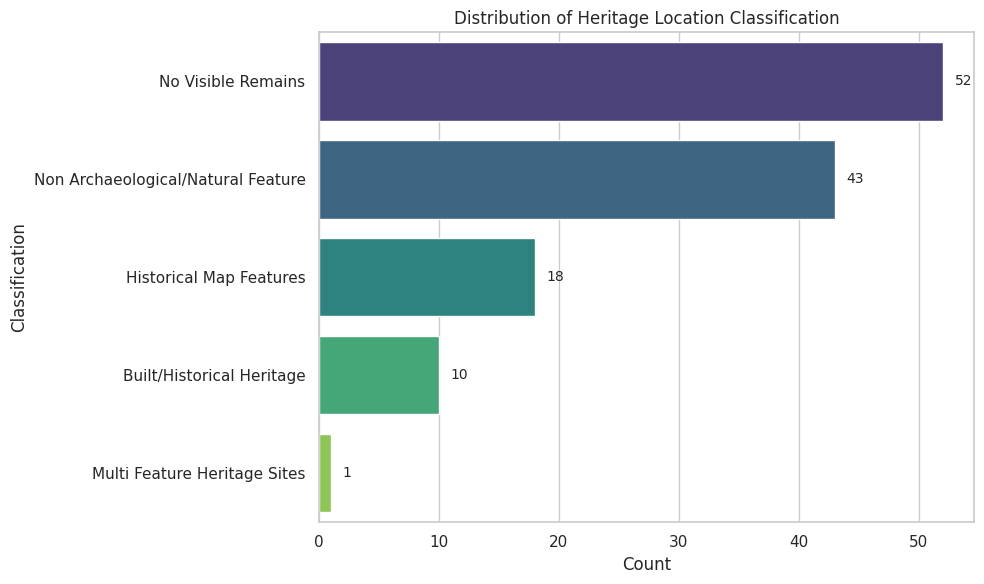

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.countplot(data=mahsa_sites, 
                   y="heritage_location_classification", 
                   order=mahsa_sites["heritage_location_classification"].value_counts().index,
                   palette="viridis")

# Add count labels to each bar
for p in ax.patches:
    count = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.text(count + 1, y, str(count), va='center', fontsize=10)

plt.title("Distribution of Heritage Location Classification")
plt.xlabel("Count")
plt.ylabel("Classification")
plt.tight_layout()
plt.show()


In [29]:
pd.crosstab(mahsa_sites["heritage_location_classification"], mahsa_sites["heritage_location_form"])


heritage_location_form,Medium Mound,Mound,Multi-Feature,Small Mound,Structure,Structure/s
heritage_location_classification,,,,,,
Built/Historical Heritage,1,2,0,2,3,1
Historical Map Features,0,18,0,0,0,0
Multi Feature Heritage Sites,0,0,1,0,0,0
No Visible Remains,0,5,0,0,0,0
Non Archaeological/Natural Feature,0,4,0,0,0,0


# column geometry

In [30]:
print(geometry := mahsa_sites["geometry"].unique())

<GeometryArray>
[<POINT (76.152 30.695)>, <POINT (75.988 30.701)>, <POINT (75.854 30.669)>,
  <POINT (75.783 30.78)>,  <POINT (76.067 30.72)>, <POINT (75.973 30.702)>,
 <POINT (75.742 30.663)>, <POINT (75.916 30.603)>, <POINT (75.918 30.617)>,
 <POINT (76.187 30.692)>,
 ...
 <POINT (75.934 30.763)>, <POINT (75.925 30.805)>, <POINT (75.767 30.642)>,
 <POINT (75.881 30.663)>, <POINT (75.768 30.657)>, <POINT (75.891 30.625)>,
 <POINT (76.106 30.711)>, <POINT (75.735 30.678)>,  <POINT (75.898 30.63)>,
  <POINT (76.08 30.638)>]
Length: 123, dtype: geometry


In [31]:
from shapely.geometry import Point

# Check if all geometries are of type Point
all_points = mahsa_sites["geometry"].apply(lambda geom: isinstance(geom, Point)).all()

print("Are all geometries Points?", all_points)
mahsa_sites[~mahsa_sites["geometry"].apply(lambda g: isinstance(g, Point))]


Are all geometries Points? True


,mahsa_id,heritage_location_classification,heritage_location_form,heritage_location_interperation,geometry


# column : heritage_location_form

In [35]:
print(heritage_loc_form := mahsa_sites["heritage_location_form"].unique())

['Mound' None 'Structure' 'Multi-Feature' 'Small Mound' 'Structure/s'
 'Medium Mound']


In [37]:
print("Count of each heritage location form:")
print(mahsa_sites["heritage_location_form"].value_counts())


Count of each heritage location form:
heritage_location_form
Mound            29
Structure         3
Small Mound       2
Multi-Feature     1
Structure/s       1
Medium Mound      1
Name: count, dtype: int64


In [38]:
none_count = mahsa_sites["heritage_location_form"].isnull().sum()
print(f"Number of None (missing) values: {none_count}")


Number of None (missing) values: 87


/tmp/ipykernel_4998/3677775442.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mahsa_sites,


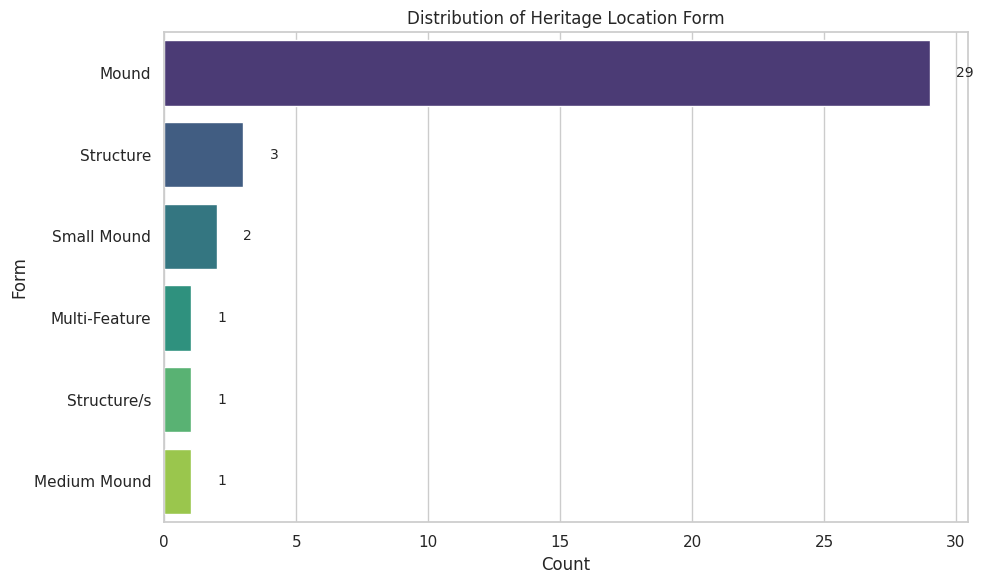

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.countplot(data=mahsa_sites, 
                   y="heritage_location_form", 
                   order=mahsa_sites["heritage_location_form"].value_counts().index,
                   palette="viridis")

# Add count labels to each bar
for p in ax.patches:
    count = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.text(count + 1, y, str(count), va='center', fontsize=10)

plt.title("Distribution of Heritage Location Form")
plt.xlabel("Count")
plt.ylabel("Form")
plt.tight_layout()
plt.show()


# column : heritage_location_interperation

In [44]:
print(heritage_loc_interpret := mahsa_sites["heritage_location_interperation"].unique())

print("Count of each heritage location interperation:")
print(mahsa_sites["heritage_location_interperation"].value_counts())

none_count_interperation = mahsa_sites["heritage_location_interperation"].isnull().sum()
print(f"Number of None (missing) values: {none_count_interperation}")


['Unknown' None 'Temple' 'Settlement Site' 'Shrine'
 'Settlement/Habitation Site' 'Fort/Fortress' 'Religious Complex'
 'Tomb/Grave/Burial']
Count of each heritage location interperation:
heritage_location_interperation
Unknown                       27
Religious Complex              3
Temple                         2
Settlement Site                1
Shrine                         1
Settlement/Habitation Site     1
Fort/Fortress                  1
Tomb/Grave/Burial              1
Name: count, dtype: int64
Number of None (missing) values: 87


/tmp/ipykernel_4998/3922875441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=mahsa_sites,


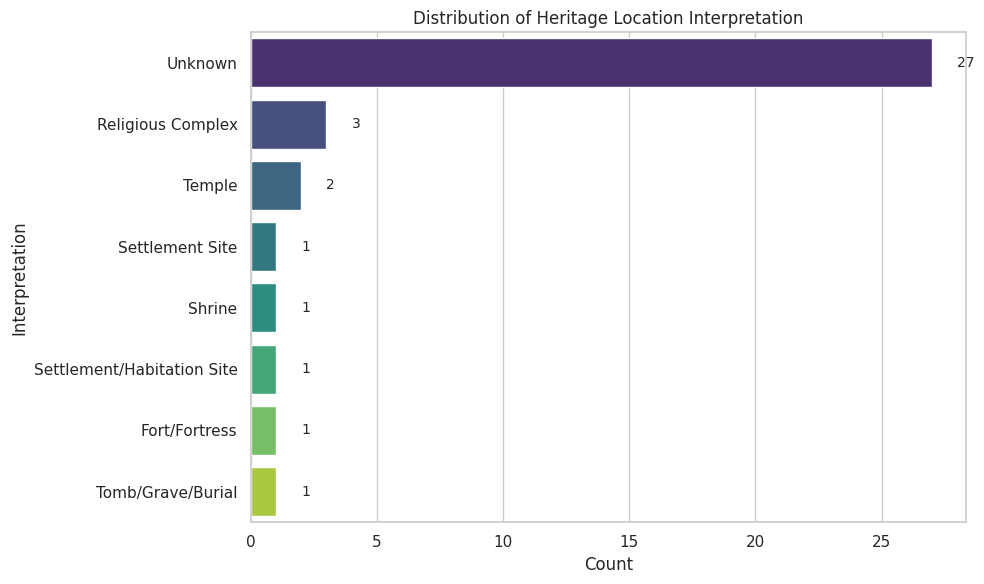

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.countplot(data=mahsa_sites, 
                   y="heritage_location_interperation", 
                   order=mahsa_sites["heritage_location_interperation"].value_counts().index,
                   palette="viridis")

# Add count labels to each bar
for p in ax.patches:
    count = int(p.get_width())
    y = p.get_y() + p.get_height() / 2
    ax.text(count + 1, y, str(count), va='center', fontsize=10)

plt.title("Distribution of Heritage Location Interpretation")
plt.xlabel("Count")
plt.ylabel("Interpretation")
plt.tight_layout()
plt.show()


<Axes: >

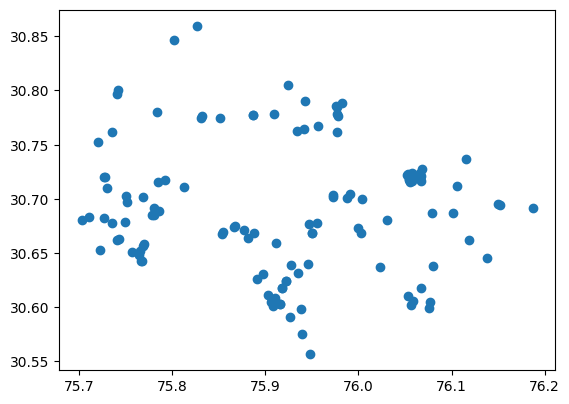

In [7]:
mahsa_sites.plot()

# plotting on the world map

In [10]:
# pip install contextily


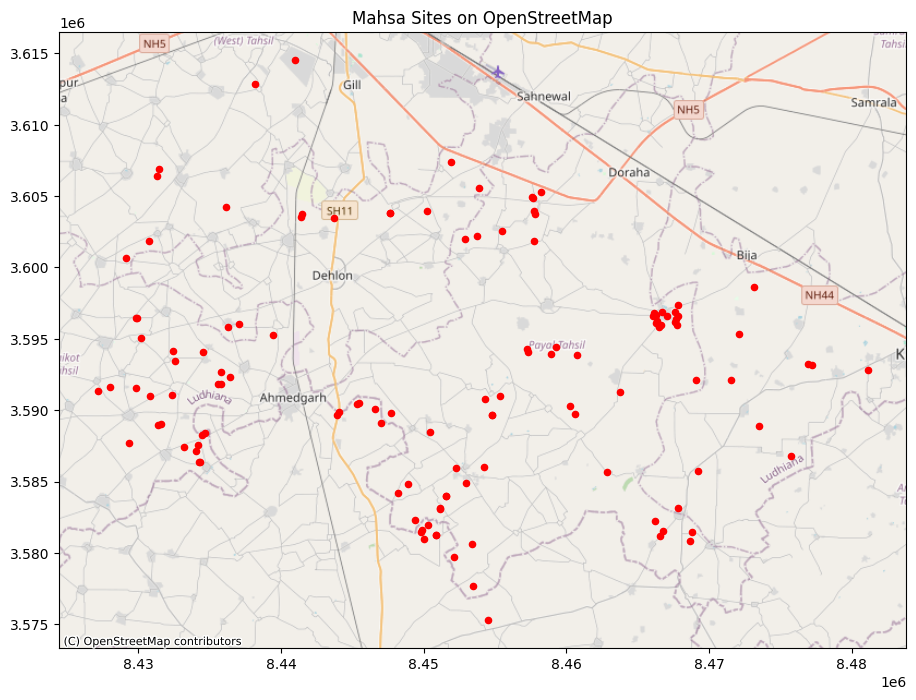

In [ ]:
# Convert to Web Mercator for tile compatibility
mahsa_sites = mahsa_sites.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
mahsa_sites.plot(ax=ax, color='red', markersize=20)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title("Mahsa Sites on OpenStreetMap")
plt.show()


# .shp file

   FID                                           geometry
0    0  POLYGON Z ((76 31 0, 77 31 0, 77 30 0, 76 30 0...
1    1  POLYGON Z ((75 31 0, 76 31 0, 76 30 0, 75 30 0...
EPSG:4326


<Axes: >

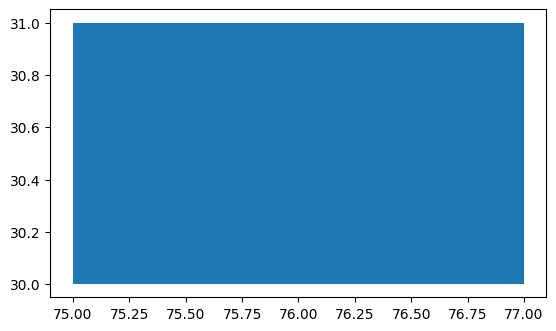

In [4]:
# Path to the shapefile
shp_path = "MAHSA_AOI_F&T.shp"

# Load shapefile
gdf_shp = gpd.read_file(shp_path)

# Show first few rows
print(gdf_shp.head())

# Print coordinate reference system
print(gdf_shp.crs)
gdf_shp.plot()

# .tar.gz file

In [17]:
import tarfile

# Path to your .tar.gz file
tar_path = "/home/snehal/Downloads/MAHSA_AOI_F&T/dims_op_oc_dfd2_691419231_1.tar.gz"

# Extract to a folder
extract_folder = "extracted_tar_1"

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_folder)

print(f"Extracted files to: {extract_folder}")


Extracted files to: extracted_tar_1


In [19]:
import os

files = os.listdir("extracted_tar_1")
print(files)


['dims_op_oc_dfd2_691419231_1']


In [21]:
inner_folder = "extracted_tar_1/dims_op_oc_dfd2_691419231_1"
inner_files = os.listdir(inner_folder)
print(inner_files)


['readme.html', 'TDM.DEM.DEM', 'tools']


In [46]:
from bs4 import BeautifulSoup

# Path to the HTML file
html_path = "extracted_tar_1/dims_op_oc_dfd2_691419231_1/readme.html"

# Read and parse the HTML
with open(html_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Extract and print plain text
text = soup.get_text(separator="\n", strip=True)
print(text)  # Show first 2000 characters


dims_op_oc_dfd2_691419229
ADMINISTRATIVE DATA
Order 
                                       ID
dims_op_oc_dfd2_691419229
Package 
                                       ID
dims_op_oc_dfd2_691419231
Volume 
                                       No.
1/
                                          		   20
Production 
                                       Date
2022-07-19
Volume 
                                 Content
This 
                                 data collection has
been
produced
as a service of
DLR 
                                 - DFD
Copyright ©
                           2022 DLR
No.
Product Type
Product Reference 
                  ID
Volume
Path
©
1
TDM.DEM.DEM
dims_op_pl_dfd_XXXXB00000000475928935935
9
TDM.DEM.DEM/TDM1_DEM__04_N25E065_V02_C
©
TDM/DEM/DEM/0.4/65/25/66/26/2/COMPLETED
2
TDM.DEM.DEM
dims_op_pl_dfd_XXXXB00000000377612081138
11
TDM.DEM.DEM/TDM1_DEM__04_N25E066_V01_C
©
TDM/DEM/DEM/0.4/66/25/67/26/1/COMPLETED
3
TDM.DEM.DEM
dims_op_pl_dfd_XXXXB0000000037761208096

In [18]:
import tarfile

# Path to your .tar.gz file
tar_path = "/home/snehal/Downloads/MAHSA_AOI_F&T/dims_op_oc_dfd2_691419231_3.tar.gz"

# Extract to a folder
extract_folder = "extracted_tar_2"

with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_folder)

print(f"Extracted files to: {extract_folder}")


Extracted files to: extracted_tar_2


In [20]:
import os

files = os.listdir("extracted_tar_2")
print(files)


['dims_op_oc_dfd2_691419231_3']


In [ ]:
import rasterio
from rasterio.plot import show
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to your DEM tile (.tif)
dem_file = "TDM1_DEM__04_N64W018_DEM.tif"

# Open DEM file
with rasterio.open(dem_file) as src:
    bounds = src.bounds  # returns left, bottom, right, top
    crs = src.crs

# Create polygon from bounds
footprint = box(*bounds)  # creates rectangular polygon
gdf = gpd.GeoDataFrame({'geometry': [footprint]}, crs=crs)

# Plot the polygon footprint
gdf.plot(edgecolor='red', facecolor='none', linewidth=2)
plt.title("DEM Tile Footprint")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
